# Pi4 Optimization Benchmarks
*Ubuntu 22.04 VM - 8vCores - Ryzen 7 5800X (3,8-4,6 GhHz) - 16GB Memory*

## Reproduction of Results
1. Build the benchmark CLI using dune: `dune build`
2. Run `benchmark.py` - This will take multiple Hours (Tip: For quick examples reduce the number of runs per Program (`runs_pp`))
3. Replace the value for `input_file` by *./results.csv* and run this notebook

In [1]:
import pandas as pd

input_file = './results_final.csv'

flag_list = [ '-f', '-i', '-n', '-f -i -n' ]
title_list = [ 'Substitution Inlining', 'Instance Cache', 'Length Cache', 'Optimized']
color_mapping = {'Substitution Inlining':'#1F77B4', 'Instance Cache':'#FF7F0E','Length Cache':'#2CA02C', 'Optimized':'#D62728', 'Unoptimized':'grey'}

data = pd.read_csv(input_file, index_col=0)

data = data.fillna('Unoptimized')
data = data.replace(flag_list, title_list)
data = data.groupby(['program', 'Optimizations']).mean()
data = pd.pivot_table(
    data,
    values='runtime',
    index='program',
    columns='Optimizations',
)
neworder = ['Substitution Inlining', 'Instance Cache', 'Length Cache', 'Optimized','Unoptimized' ]
data=data.reindex(columns=neworder)
data_fast = data.iloc[:10,:]
data_slow = data.iloc[10:,:]

## Absolute Results < 3s

In [2]:
data_fast

Optimizations,Substitution Inlining,Instance Cache,Length Cache,Optimized,Unoptimized
program,,,,,
determined_forwarding_safe,43.88,43.04,42.95,43.13,44.24
determined_forwarding_unsafe,263.02,261.41,265.03,262.91,260.43
header_dependency_safe,775.82,777.85,307.29,306.69,784.27
header_dependency_unsafe,1220.51,1357.87,773.61,632.00,1352.19
ipv4_opt_safe,1999.05,2178.58,1149.33,951.41,2181.67
ipv4_opt_unsafe,1833.10,2062.81,897.34,646.10,2066.42
ipv4_ttl_safe,260.42,273.18,286.75,255.28,286.73
ipv4_ttl_unsafe,360.26,337.02,346.18,347.73,344.89
mutual_exclusion_ingress_safe,252.20,239.54,237.09,252.04,239.11


Text(0, 0.5, 'Check-Time [ms]')

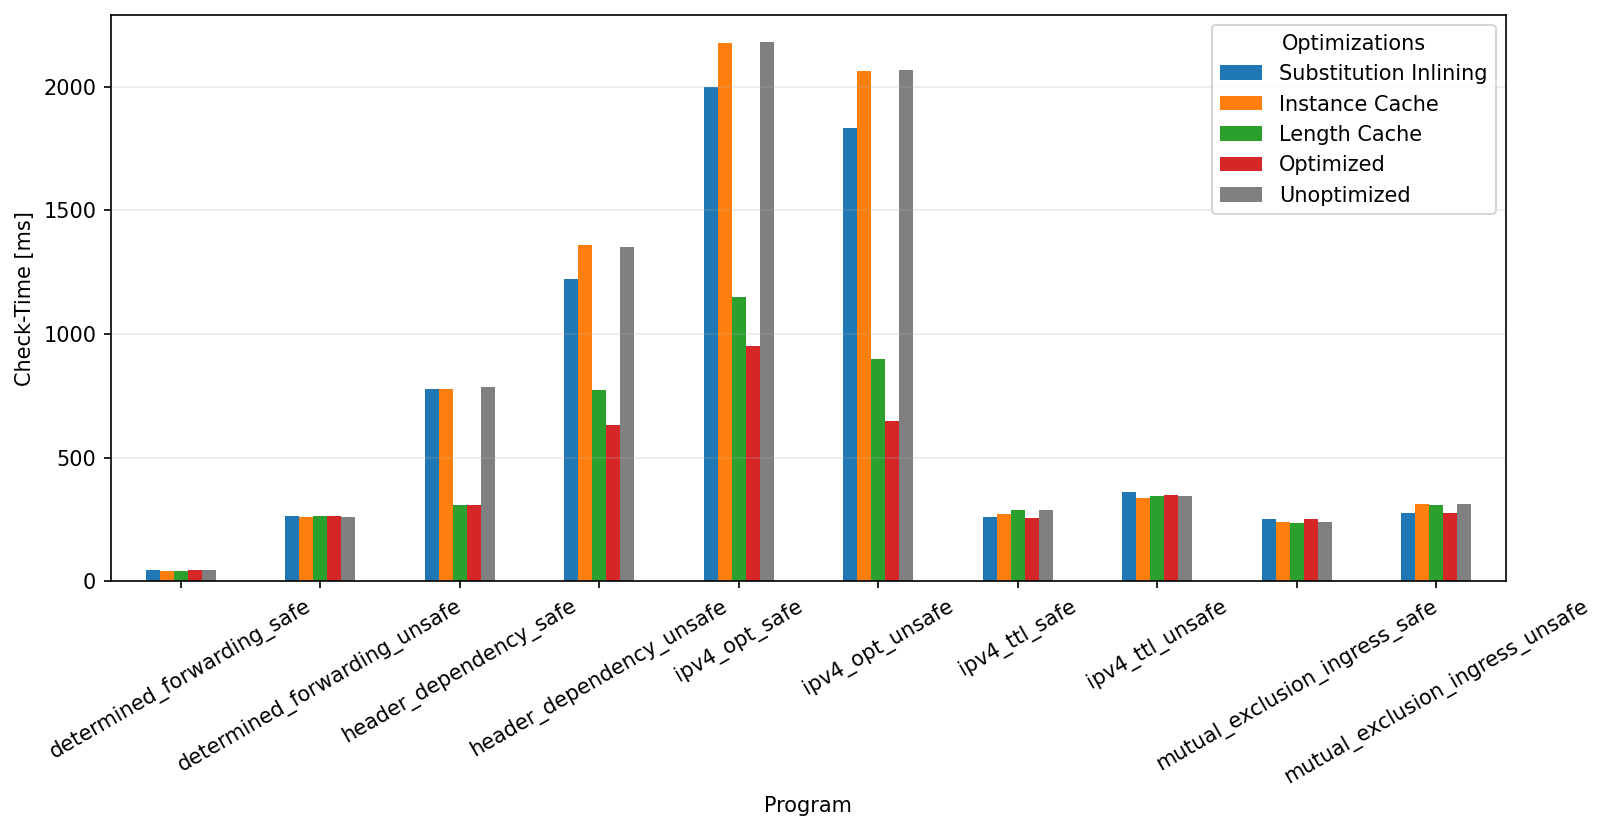

In [3]:
plot_fast = data_fast.plot(kind='bar', rot=30, color=[color_mapping.get(x) for x in data_fast.columns])
fig_fast = plot_fast.get_figure()
fig_fast.set_size_inches(12, 5)
fig_fast.set_dpi(150)
plot_fast.grid(axis='y', linewidth=0.2)
plot_fast.set_xlabel("Program")
plot_fast.set_ylabel("Check-Time [ms]")

## Absolute Results > 3s

In [4]:
data_slow

Optimizations,Substitution Inlining,Instance Cache,Length Cache,Optimized,Unoptimized
program,,,,,
roundtripping_safe,38866.73,68889.38,68862.80,37202.44,69643.03
roundtripping_unsafe,1996.25,2946.79,2236.97,1129.75,3049.42
tut_basic_safe,7582.41,14504.31,15592.39,5881.58,15836.52
tut_basic_unsafe,11682.74,10226.61,11387.02,10042.44,11587.43
tut_load_balance_safe,37624.01,47972.51,66187.55,27371.51,66610.48
tut_load_balance_unsafe,38794.42,46498.75,66544.05,28627.39,66511.10
tut_tunnel_safe,15957.66,39599.15,48104.68,11301.05,48368.62
tut_tunnel_unsafe,16641.50,40405.18,50446.86,12446.34,50963.31
vlan_decap_safe,5604.34,3491.20,4710.65,1915.63,5836.17


Text(0, 0.5, 'Check-Time [ms]')

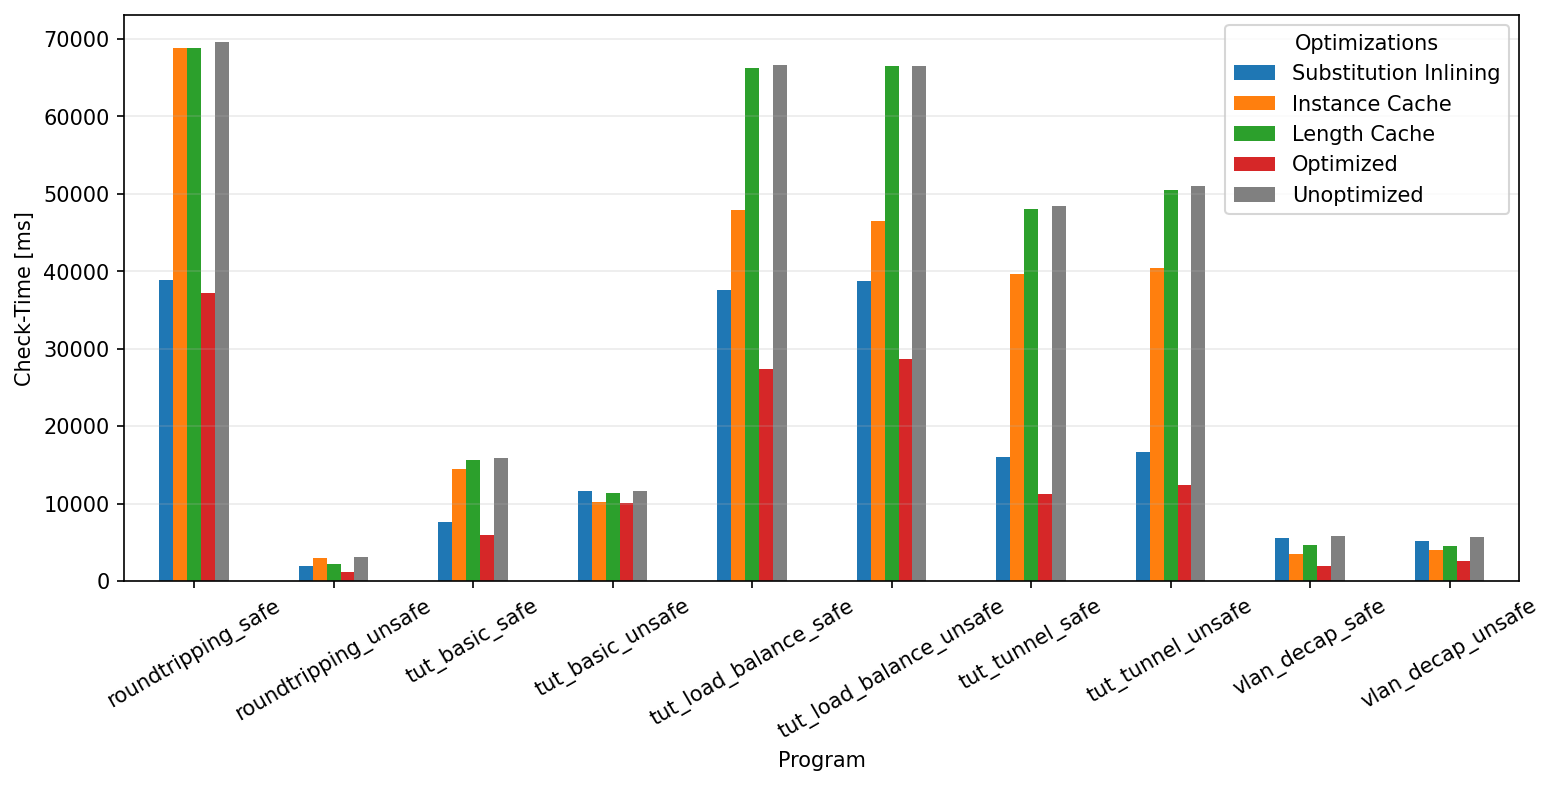

In [5]:
plot_slow = data_slow.plot(kind='bar', rot=30, color=[color_mapping.get(x) for x in data_slow.columns])
fig_slow = plot_slow.get_figure()
fig_slow.set_size_inches(12, 5)
fig_slow.set_dpi(150)
plot_slow.grid(axis='y', linewidth=0.2)
plot_slow.set_xlabel("Program")
plot_slow.set_ylabel("Check-Time [ms]")

Relative Speed Up for Runtime < 3s

In [6]:
data_rel_fast = data_fast.copy()
for title in title_list:
    data_rel_fast[title] = (100 / data_rel_fast['Unoptimized']) * (data_rel_fast['Unoptimized'] - data_rel_fast[title])
del data_rel_fast['Unoptimized']
data_rel_fast

Optimizations,Substitution Inlining,Instance Cache,Length Cache,Optimized
program,,,,
determined_forwarding_safe,0.813743,2.712477,2.915913,2.509042
determined_forwarding_unsafe,-0.994509,-0.376301,-1.766310,-0.952271
header_dependency_safe,1.077435,0.818596,60.818341,60.894845
header_dependency_unsafe,9.738276,-0.420059,42.788366,53.261006
ipv4_opt_safe,8.370652,0.141635,47.318797,56.390747
ipv4_opt_unsafe,11.291025,0.174698,56.575140,68.733365
ipv4_ttl_safe,9.175880,4.725700,-0.006975,10.968507
ipv4_ttl_unsafe,-4.456493,2.281887,-0.374032,-0.823451
mutual_exclusion_ingress_safe,-5.474468,-0.179834,0.844799,-5.407553


Text(0, 0.5, 'Relative reduction of Runtime [%]')

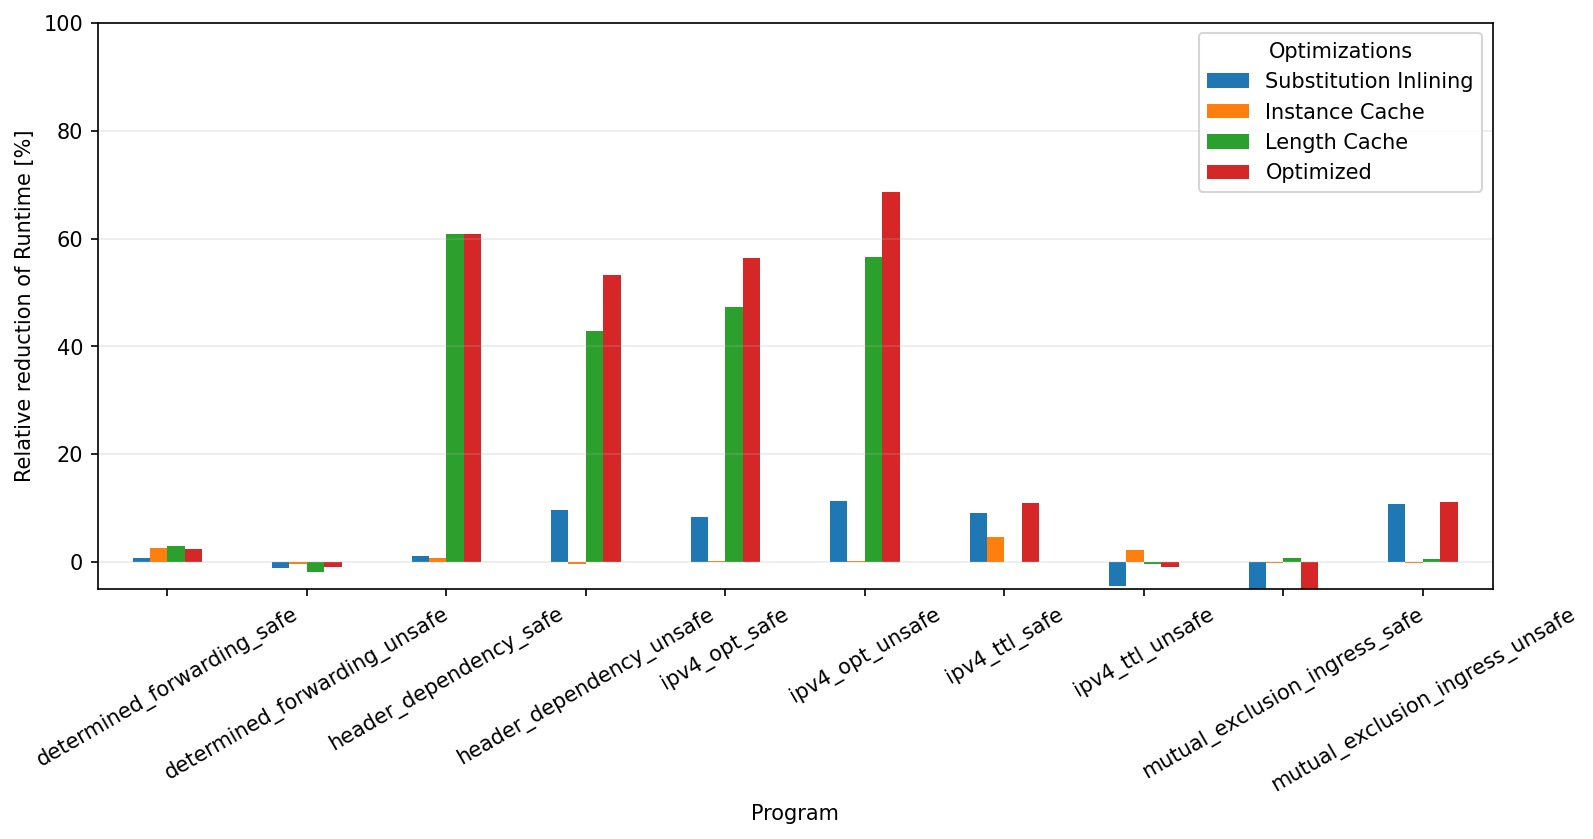

In [7]:
plot_rel_fast = data_rel_fast.plot(kind='bar', rot=30, color=[color_mapping.get(x) for x in data_rel_fast.columns])
fig_rel_fast = plot_rel_fast.get_figure()
fig_rel_fast.set_size_inches(12, 5)
fig_rel_fast.set_dpi(150)
plot_rel_fast.set_ylim(-5, 100)
plot_rel_fast.grid(axis='y', linewidth=0.2)
plot_rel_fast.set_xlabel("Program")
plot_rel_fast.set_ylabel("Relative reduction of Runtime [%]")

## Relative Speed Up for Runtime > 3s

In [8]:
data_rel_slow = data_slow.copy()
for title in title_list:
    data_rel_slow[title] = (100 / data_rel_slow['Unoptimized']) * (data_rel_slow['Unoptimized'] - data_rel_slow[title])
del data_rel_slow['Unoptimized']
data_rel_slow

Optimizations,Substitution Inlining,Instance Cache,Length Cache,Optimized
program,,,,
roundtripping_safe,44.191501,1.082161,1.120327,46.581244
roundtripping_unsafe,34.536732,3.365558,26.642771,62.951971
tut_basic_safe,52.120731,8.412265,1.541563,62.860654
tut_basic_unsafe,-0.822529,11.743933,1.729547,13.333328
tut_load_balance_safe,43.516381,27.980537,0.634930,58.908103
tut_load_balance_unsafe,41.672262,30.088737,-0.049541,56.958478
tut_tunnel_safe,67.008238,18.130495,0.545684,76.635575
tut_tunnel_unsafe,67.346116,20.717120,1.013376,75.577842
vlan_decap_safe,3.972297,40.179947,19.285250,67.176590


Text(0, 0.5, 'Relative reduction of Runtime [%]')

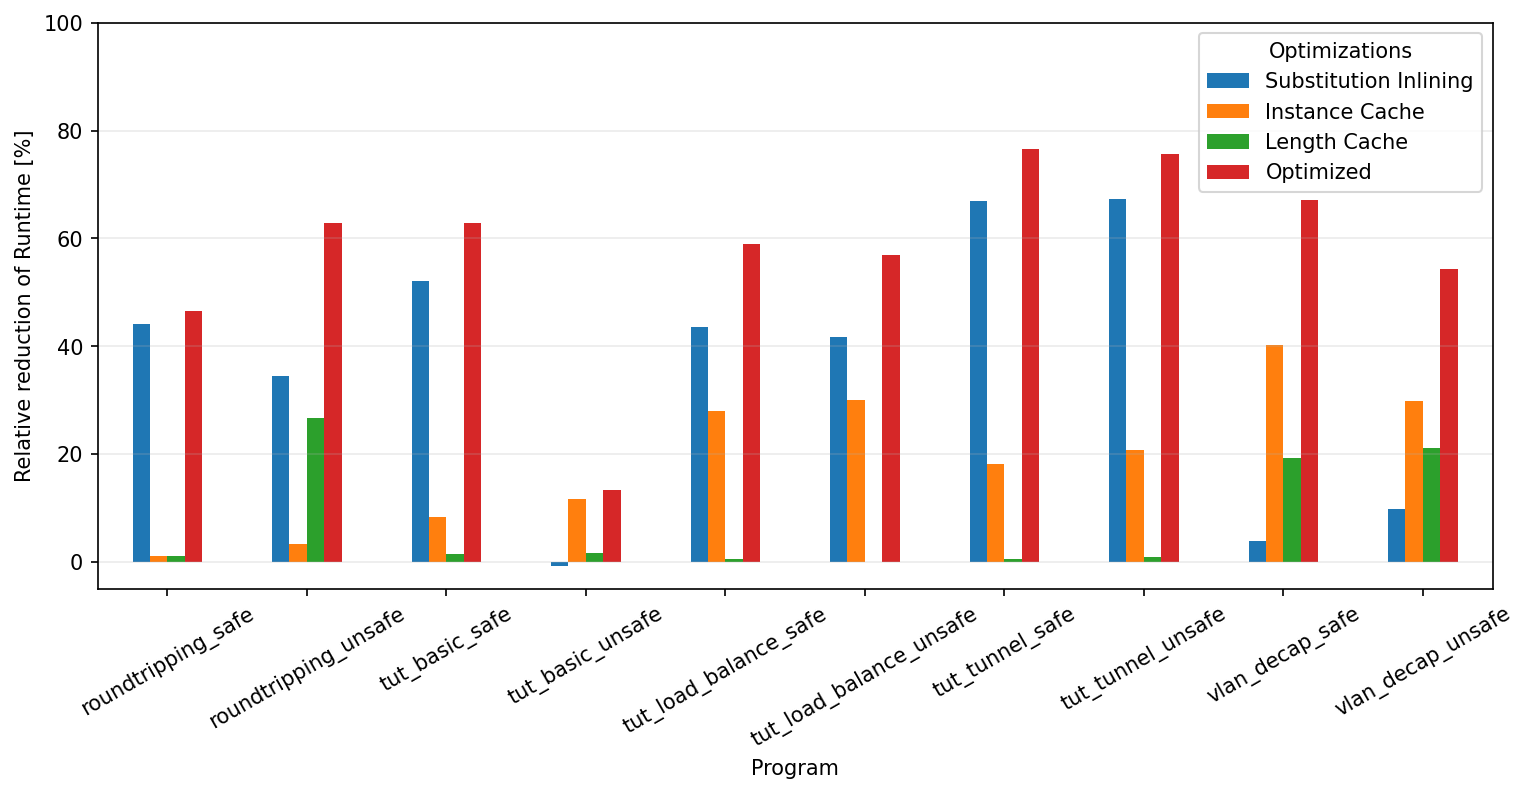

In [9]:
plot_rel_slow = data_rel_slow.plot(kind='bar', rot=30, color=[color_mapping.get(x) for x in data_rel_slow.columns])
fig_rel_slow = plot_rel_slow.get_figure()
fig_rel_slow.set_size_inches(12, 5)
fig_rel_slow.set_dpi(150)
plot_rel_slow.set_ylim(-5, 100)
plot_rel_slow.grid(axis='y', linewidth=0.2)
plot_rel_slow.set_xlabel("Program")
plot_rel_slow.set_ylabel("Relative reduction of Runtime [%]")

## Mean Speedup

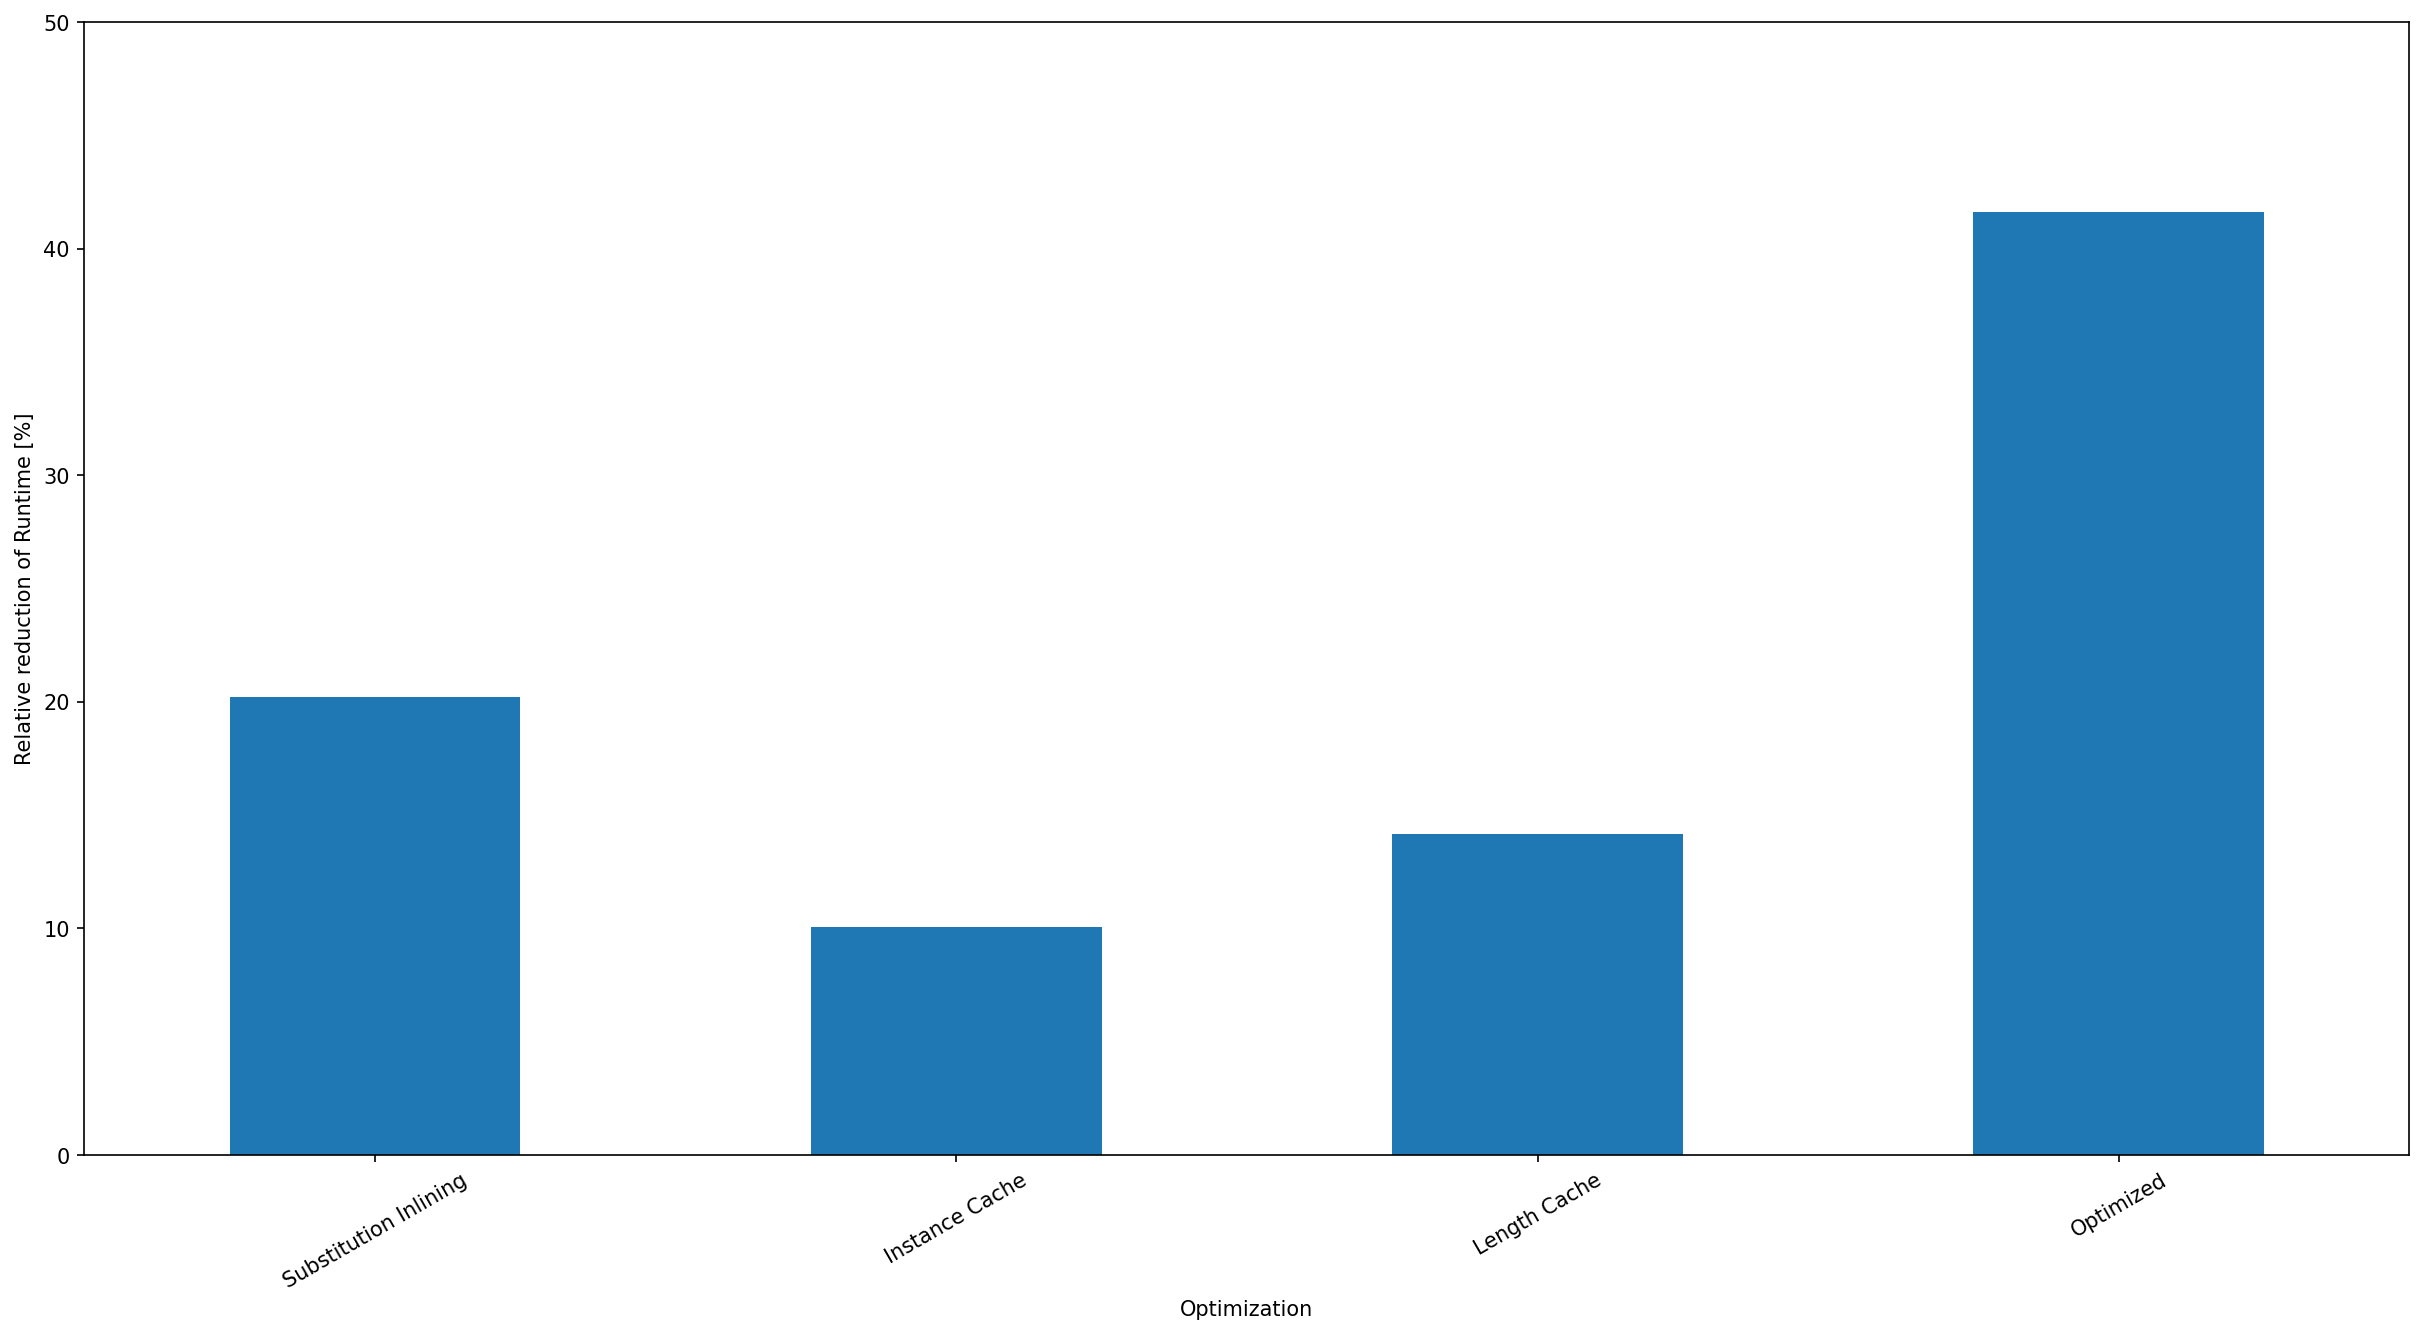

In [10]:
data_rel = data.copy()
for title in title_list:
    data_rel[title] = (100 / data_rel['Unoptimized']) * (data_rel['Unoptimized'] - data_rel[title])
del data_rel['Unoptimized']
data_rel
data_mean = data_rel.copy().mean()
plot_mean = data_mean.plot(kind='bar', rot=30)
plot_mean.set_ylim(0,50)
plot_mean.set_xlabel("Optimization")
plot_mean.set_ylabel("Relative reduction of Runtime [%]")
fig_mean = plot_mean.get_figure()
fig_mean.set_size_inches(20, 10)
fig_mean.set_dpi(150)

In [11]:
data_mean

Optimizations
Substitution Inlining    20.185655
Instance Cache           10.063101
Length Cache             14.160618
Optimized                41.606867
dtype: float64

# Thesis Figures

Text(0, 0.5, 'Check-Time [ms]')

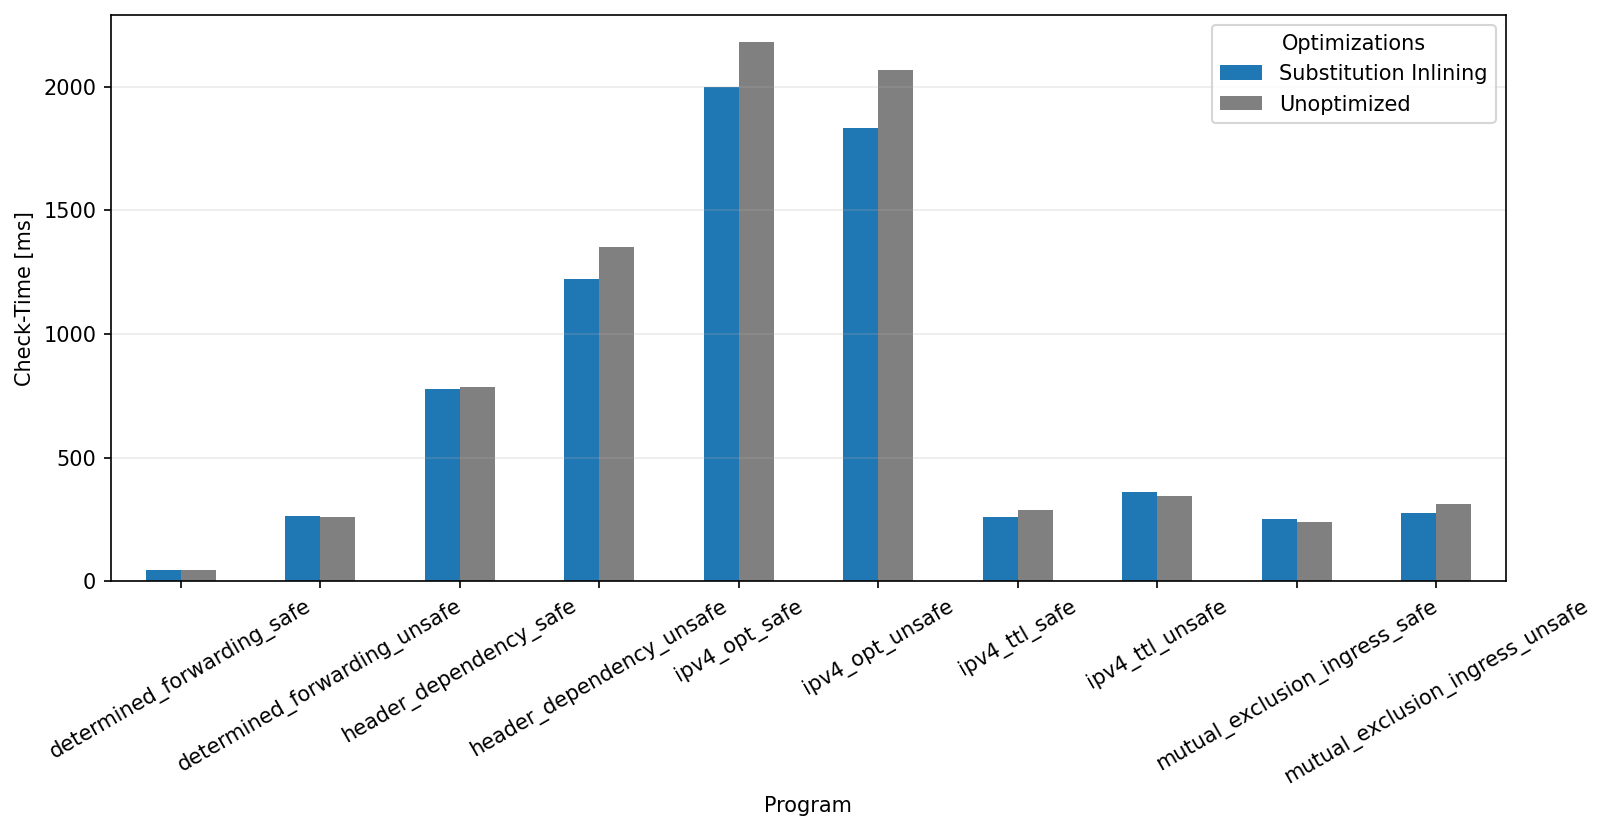

In [12]:
data_fig1 = data_fast.copy()
data_fig1 = data_fig1.drop(columns=['Instance Cache', 'Length Cache', 'Optimized'])
plt_fig1 = data_fig1.plot(kind='bar', rot=30, color=[color_mapping.get(x) for x in data_fig1.columns])
fg_fig1 = plt_fig1.get_figure()
fg_fig1.set_size_inches(12, 5)
fg_fig1.set_dpi(150)
plt_fig1.grid(axis='y', linewidth=0.2)
plt_fig1.set_xlabel("Program")
plt_fig1.set_ylabel("Check-Time [ms]")

Text(0, 0.5, 'Check-Time [ms]')

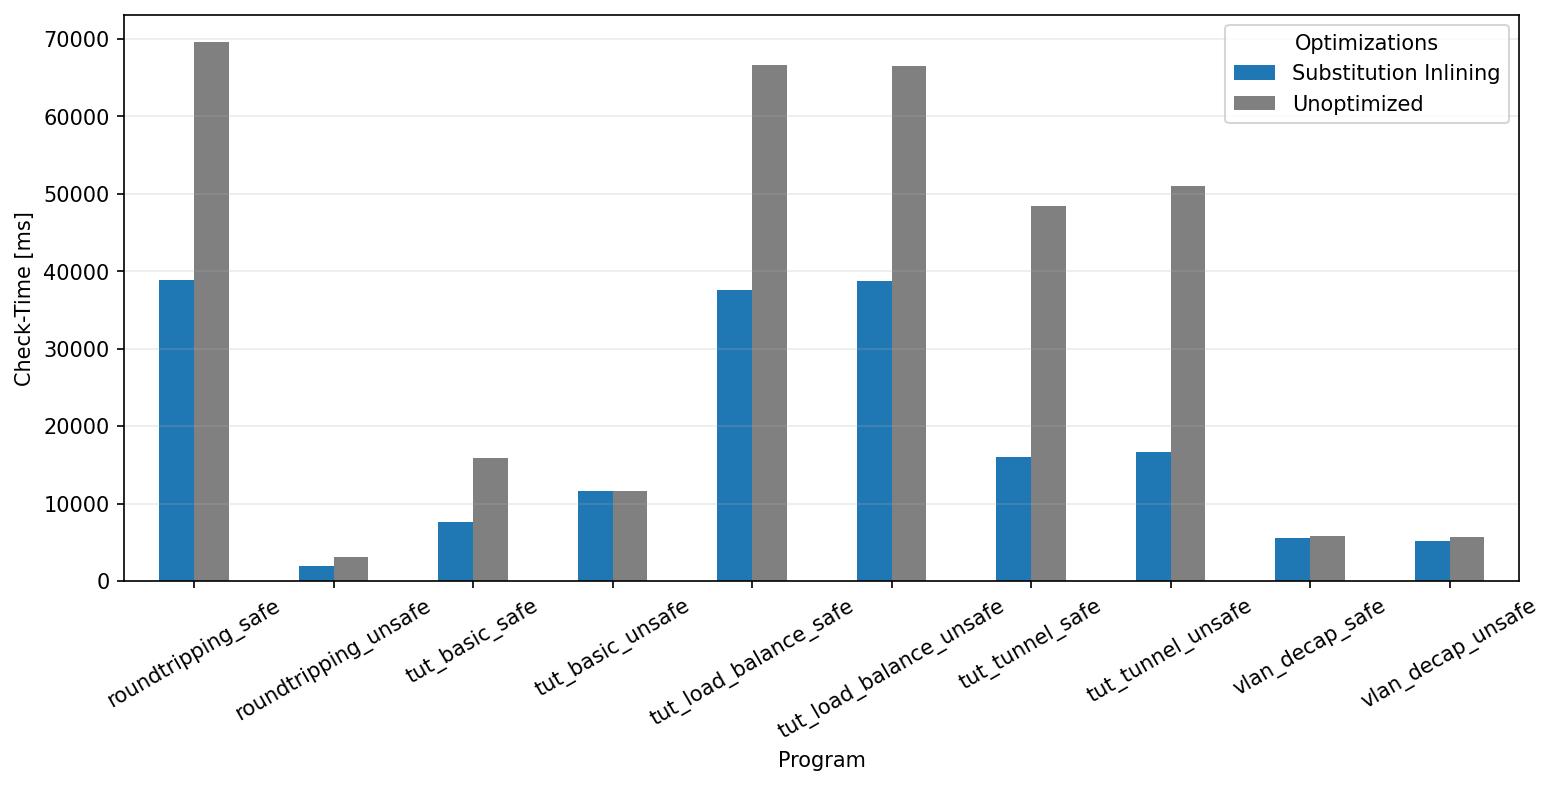

In [13]:
data_fig2 = data_slow.copy()
data_fig2 = data_fig2.drop(columns=['Instance Cache', 'Length Cache', 'Optimized'])
plt_fig2 = data_fig2.plot(kind='bar', rot=30, color=[color_mapping.get(x) for x in data_fig2.columns])
fg_fig2 = plt_fig2.get_figure()
fg_fig2.set_size_inches(12, 5)
fg_fig2.set_dpi(150)
plt_fig2.grid(axis='y', linewidth=0.2)
plt_fig2.set_xlabel("Program")
plt_fig2.set_ylabel("Check-Time [ms]")

Text(0, 0.5, 'Check-Time [ms]')

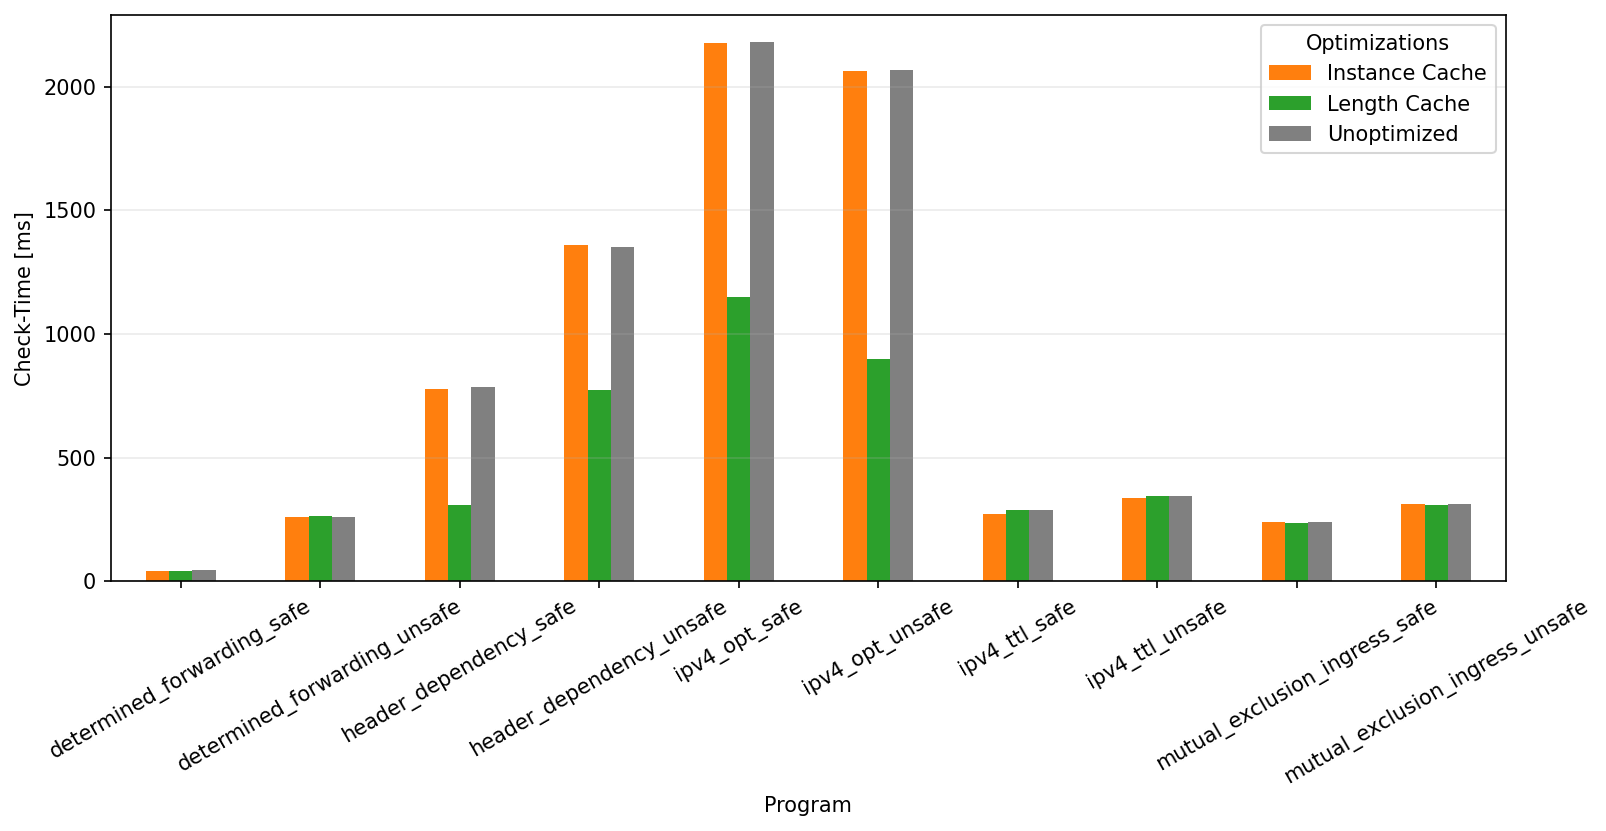

In [14]:
data_fig3 = data_fast.copy()
data_fig3 = data_fig3.drop(columns=['Substitution Inlining', 'Optimized'])
plt_fig3 = data_fig3.plot(kind='bar', rot=30, color=[color_mapping.get(x) for x in data_fig3.columns])
fg_fig3 = plt_fig3.get_figure()
fg_fig3.set_size_inches(12, 5)
fg_fig3.set_dpi(150)
plt_fig3.grid(axis='y', linewidth=0.2)
plt_fig3.set_xlabel("Program")
plt_fig3.set_ylabel("Check-Time [ms]")

Text(0, 0.5, 'Check-Time [ms]')

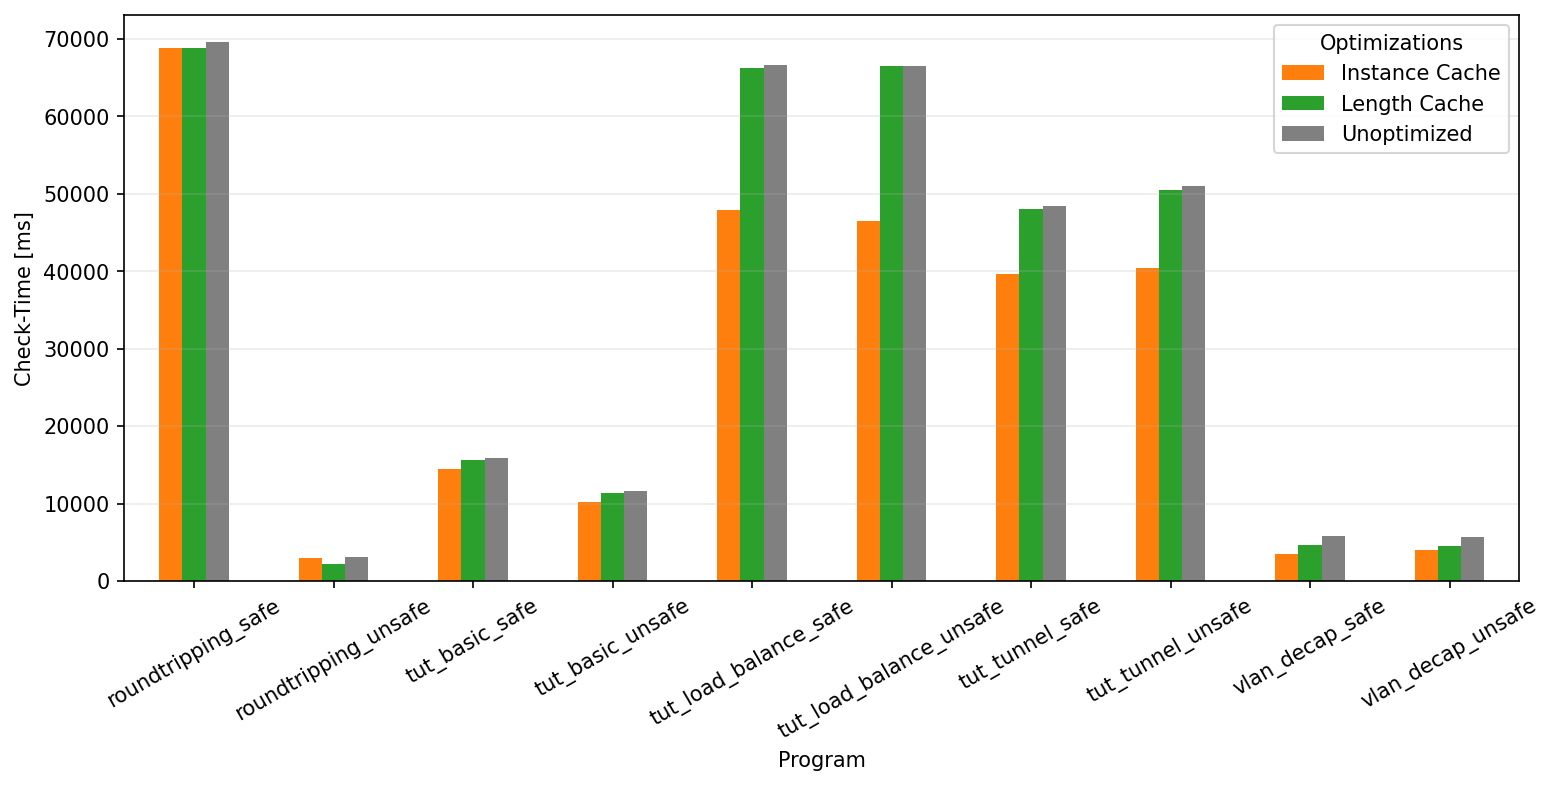

In [15]:
data_fig4 = data_slow.copy()
data_fig4 = data_fig4.drop(columns=['Substitution Inlining', 'Optimized'])
plt_fig4 = data_fig4.plot(kind='bar', rot=30, color=[color_mapping.get(x) for x in data_fig4.columns])
fg_fig4 = plt_fig4.get_figure()
fg_fig4.set_size_inches(12, 5)
fg_fig4.set_dpi(150)
plt_fig4.grid(axis='y', linewidth=0.2)
plt_fig4.set_xlabel("Program")
plt_fig4.set_ylabel("Check-Time [ms]")